<img src="Figures/LogoColorHorizontal.png" style="width:200px" align="left">    <img src="Figures/MetaWorksLogo.png" style="width:200px" align="right">

***

# Computing Array Factors and Radiation Patterns in MetaWorks

### April 13, 2020

---

### Contents

* The coordinate system
* Fields from an array
* Visualizing radiation patterns
* Visualizing beam patterns in two dimensions
* Directive gain and directivity

Intitialize math and plotting libraries:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from metaworks.SystemArchitecture import SystemArchitecture

## The coordinate systems

The main way in which to visualize the operation of a metasurface antenna is through the array factor. To avoid confusion, we derive the array factor here, paying careful attention to the choice of coordinate system. The MetaWorks routines assume that one-dimensional arrays extend along the $\hat{x}$ direction, while two-dimensional arrays lie in the $\hat{x}-\hat{y}$ plane. The broadside direction is thus along the $\hat{z}$ axis, as illustrated below.

<img src="Figures/coordinate_system.png" style="width:400px" align="center"> 

A standard spherical coordinate system has been used here. Note that the angular variables are $\theta$ and $\phi$. $\theta$ extends from the $\hat{z}$ axis, while $\phi$ extends from the $\hat{x}$ axis and lies within the $\hat{x}-\hat{y}$ plane. There is a close connection with azimuthal and elevation angles, with $\phi$ corresponding to the azimuthal angle. The elevation angle, however, is typically measured from the horizon, so that the elevation angle is zero for points within the $\hat{x}-\hat{y}$ plane; the angle $\theta = 90$ degrees, by contrast, for points in the same plane.

Sometimes it is useful to adopt an alternative layout in the coordinate system, in which the aperture lies in the $\hat{x}-\hat{z}$ plane, with the $\hat{y}$ direction being broadside. In this configuration, the $\theta$ slices are independent planes, as illustrated in the figure below.

<img src="Figures/coordinate_system_2.png" style="width:400px" align="center">

## Fields from an array

The metasurface antenna can be approximated as a collection of magnetic dipoles arranged over a surface. Each magnetic dipole is assumed to lie along the $\hat{y}$ direction and produces the well-known dipole radiation pattern

$\textbf{H}_{\textrm{rad}} = -\frac{\omega^2 m_y}{4 \pi |\textbf{r}-\textbf{r}'|}\sin{\gamma}e^{-jk_0|\textbf{r}-\textbf{r}'|+j\omega t}\hat{y}$

Here, $\gamma$ is the angle between the vector to the observation point and the direction of the magnetic moment (the $\hat{y}$ axis). The magnetic moment $m_y$ is a polarizability multiplying the excitation magnetic field, $\textbf{H}_{textrm{ref}}$. For the purposes of this discussion, we assume the excitation, or reference, field has the form

$\textbf{H}_{\textrm{ref}}=H_0 e^{-j (\beta_x x+\beta_y y)}\hat{y}$

The magnetic moment, then, is

$m_y(x,y)=\alpha_m(x,y)H_0 e^{-j (\beta_x x+\beta_y y)}$

The far-field can be found as the sum of the fields from each of the dipole radiators. We assume now an array format, so that $x_i=i d_x$ and $y_k = k d_y$, where $i$ and $k$ are integers. If there are $N_x$ dipoles along the $\hat{x}$ direction and $N_y$ dipoles along the $\hat{y}$ direction, then the total field will be

$\textbf{H}_{\textrm{rad}}=-H_0 \frac{\omega^2}{4 \pi r}\sin{\gamma}\sum_{k=1}^{N_y} \sum_{i=1}^{N_x}\alpha_{i,k}e^{-j(\beta_x x_i+\beta_y y_k)}e^{-jk_0|\textbf{r}-x_i \hat{x}-y_k \hat{y}|}\hat{y}$

Taking $\textbf{r}$ as the point of observation and $\textbf{r}'$ as the location of a given dipole, we have that $r'\ll r$. Then,

$|\textbf{r}-\textbf{r}'|\simeq r \sqrt{1-\frac{2 \textbf{r}\cdot \textbf{r}'}{r^2}} \simeq r - \hat{r} \cdot \textbf{r}' \simeq r-\hat{r}\cdot \hat{x} x_i-\hat{r}\cdot \hat{y} y_k $

From the coordinate system illustrated above, the dot products can be expanded as

$|\textbf{r}-\textbf{r}'|\simeq 1-x_i \sin{\theta} \cos{\phi}-y_k \sin{\theta} \sin{\phi}$

The total field can thus be written as

$\textbf{H}_{\textrm{rad}}=-H_0 \frac{\omega^2}{4 \pi r}e^{-j k_0 r}\sin{\gamma}\sum_{k=1}^{N_y} \sum_{i=1}^{N_x}\alpha_{i,k}e^{-j(\beta_x x_i+\beta_y y_k)}e^{jk_0\sin{\theta}\cos{\phi}x_i}e^{jk_0\sin{\theta}\sin{\phi}y_k}\hat{y}$

Note that this can also be written as a function of wave vector, or

$\textbf{H}_{\textrm{rad}}=-H_0 \frac{\omega^2}{4 \pi r}e^{-j k_0 r}\sin{\gamma}\sum_{k=1}^{N_y} \sum_{i=1}^{N_x}\alpha_{i,k}e^{-j(\beta_x x_i+\beta_y y_k)}e^{jk_{0x} x_i}e^{jk_{0y} y_k}\hat{y}$

Here, we have recast $k_{0x}=k_0 \sin{\theta}\cos{\phi}$ and $k_{0y}=k_0 \sin{\theta}\sin{\phi}$. Since $k_{0x}^2+k_{0y}^2+k_{0z}^2=k_0^2$, we have that $k_{0x}^2+k_{0y}^2 \leq k_0^2$. The far-field radiation pattern thus is the product of a term that depends only on the radius, and an *array factor* that depends on the angular coordinates:

$AF(\theta,\phi)=\sin{\gamma}\sum_{k=1}^{N_y} \sum_{i=1}^{N_x}\alpha_{i,k}e^{-j(\beta_x x_i+\beta_y y_k)}e^{jk_0\sin{\theta}\cos{\phi}x_i}e^{jk_0\sin{\theta}\sin{\phi}y_k}\hat{y}$

or,

$AF(\theta,\phi)=\sin{\gamma}\sum_{k=1}^{N_y} \sum_{i=1}^{N_x}\alpha_{i,k}e^{-j(\beta_x x_i+\beta_y y_k)}e^{jk_0 \cos{\theta_x} x_i}e^{jk_0 \cos{\theta_y} y_k}\hat{y}$

where $\cos{\theta_x}=k_{0x}/k_0$ and $\cos{\theta_y}=k_{0y}/k_0$.

The angle $\gamma$ can be written in terms of the spherical angles using $\sin{\gamma}=\sqrt{1-\sin^2{\theta} \sin^2{\phi}}$, so that

$AF(\theta,\phi)=\sqrt{1-\sin^2{\theta} \sin^2{\phi}}\sum_{k=1}^{N_y} \sum_{i=1}^{N_x}\alpha_{i,k}e^{-j(\beta_x x_i+\beta_y y_k)}e^{jk_0\sin{\theta}\cos{\phi}x_i}e^{jk_0\sin{\theta}\sin{\phi}y_k}\hat{y}$

## Visualizing Radiation Patterns

There are a variety of ways to visualize the radiation pattern associated with a metasurface antenna. If the angular coordinates are used, the natural coordinate system results in a grid of angles with $\phi$ running circumferentially and $\theta$ running longitudinally. 

To illustrate the use of MetaWorks for computing and plotting radiation patterns, we first import the necessary classes:

In [12]:
from metaworks.SystemArchitecture import SystemArchitecture
from metaworks.ModulationPattern import ModulationPattern
from metaworks.SystemOutput import SystemOutput
from metaworks.DataAnalysis import DataAnalysis

Initialize an aperture. We assume ideal (unconstrained) dipoles and a layout in two dimensions.

In [13]:
sa=SystemArchitecture()
dt = DataAnalysis()
sysOut = SystemOutput()
cm = 0.01
spcx = 0.5*cm
spcy = 0.5*cm
sa.make_linear_2D_array(spcx, spcy, number_elements_x=20, number_elements_y=20)
sa.dipole_type = 'ideal-unconstrained'

Set the modulation pattern for the dipoles:

In [14]:
modPatt = ModulationPattern(sa, modulation_type='ideal')

Next, we assume a 2D beam pattern will be formed, starting here with broadside ($\phi=0$ and $\theta=0$):

In [15]:
modPatt.directed_beam_2D(sa,0,0)

Initialize the SystemOutput and DataAnalysis classes and check the parameters are as expected:

In [16]:
SysOut = SystemOutput()
dt = DataAnalysis()
sa.summarize_parameters()

Operating Frequency: 10.0 GHz
Operating Wavelength: 2.99792458 cm
Dipole Type: ideal-unconstrained
Layout Type: linear 2D
Dipole Spacing along x: 0.5 cm
Dipole Spacing along y: 0.5 cm
Aperture Size along x: 9.5 cm
Aperture Size along y: 9.5 cm
Number of Dipoles along x: 20
Number of Dipoles along y: 20
Feed Type: plane wave
Waveguide Index: 2.5
Modulation Type: ideal


Compute a $\theta$-slice along $\phi=0$:

In [17]:
rp = SysOut.radiation_pattern_2D(sa, theta_start=-85, theta_stop=85, theta_num=100, phi_0=0, scan_type='theta_slice')

Plot a few theta slices:

In [18]:
fig = plt.figure(figsize=(24,18),dpi=300)
ScanAngles = [0, 45, 90, 135]
numAngles = len(ScanAngles)
nrows = np.rint(numAngles/2)
ncols = 2

<Figure size 7200x5400 with 0 Axes>

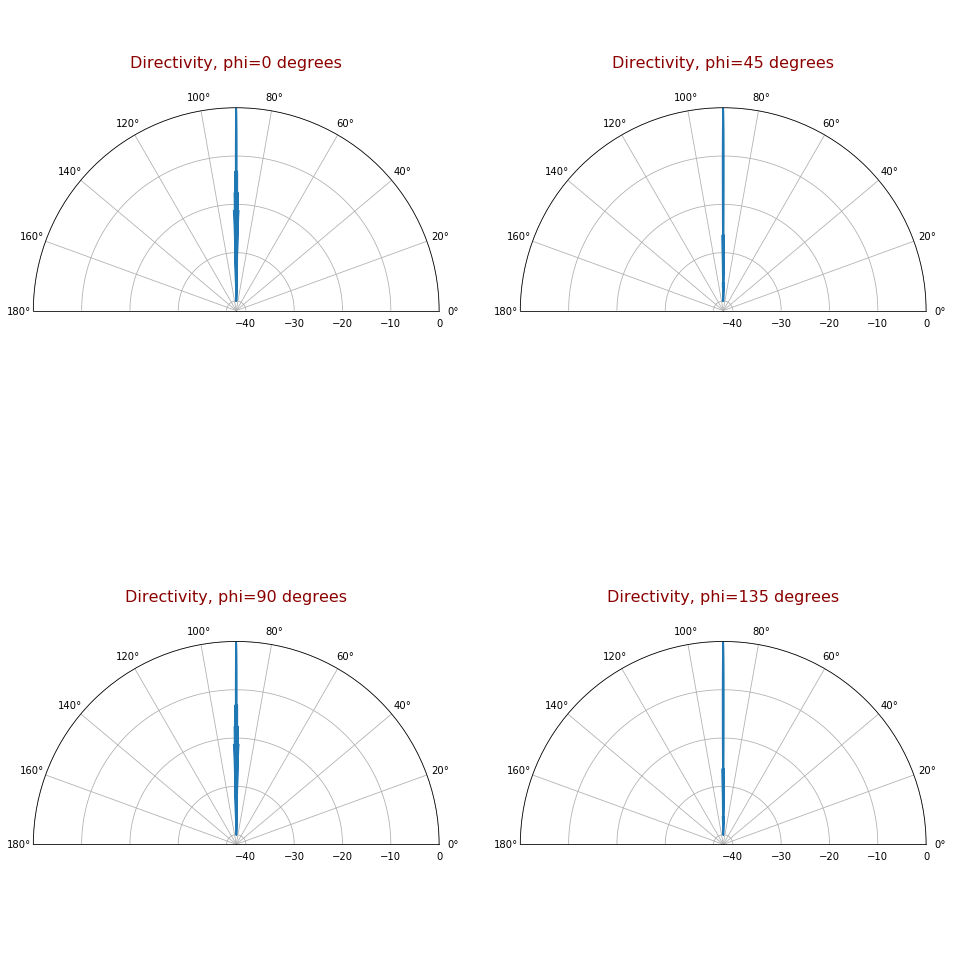

In [19]:
iPlotIndex = 1
for ScanAngle in ScanAngles:
    rp = SysOut.radiation_pattern_2D(sa, theta_start=-85, theta_stop=85, theta_num=100, 
                                   phi_0=ScanAngle, scan_type='theta_slice')
    ax = plt.subplot(nrows, ncols, iPlotIndex, projection='polar')
    dt.plot_polar_1D(rp, log_min=-40, log_max=0, title='Directivity, phi='+str(ScanAngle)+' degrees', 
                   suppress_plot=True, plot_reference = ax, plot_size_x=8, plot_size_y=10)
    u = plt.gcf()
    u.set_size_inches(16,18)
    iPlotIndex = iPlotIndex + 1

plt.show()

Try the same thing, but with with the beam directed to $\theta=30$ degrees:

In [19]:
modPatt.directed_beam_2D(sa,0,30)

In [20]:
fig = plt.figure(figsize=(24,18),dpi=300)
ScanAngles = [0, 45, 90, 135]
numAngles = len(ScanAngles)
nrows = np.rint(numAngles/2)
ncols = 2

<Figure size 7200x5400 with 0 Axes>

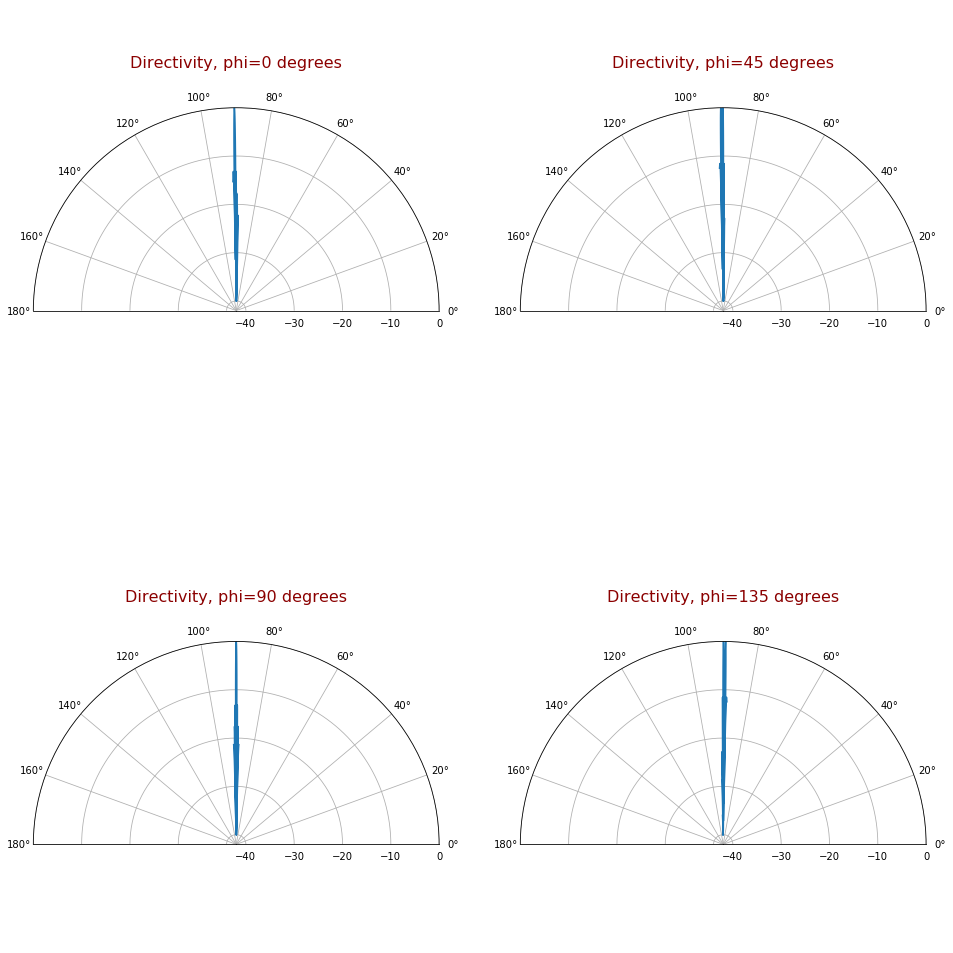

In [22]:
iPlotIndex = 1
for ScanAngle in ScanAngles:
    rp = SysOut.radiation_pattern_2D(sa, theta_start=-85, theta_stop=85, theta_num=100, 
                                   phi_0=ScanAngle, scan_type='theta_slice')
    ax = plt.subplot(nrows, ncols, iPlotIndex, projection='polar')
    dt.plot_polar_1D(rp, log_min=-40, log_max=0, title='Directivity, phi='+str(ScanAngle)+' degrees', 
                   suppress_plot=True, plot_reference = ax, plot_size_x=8, plot_size_y=10)
    u = plt.gcf()
    u.set_size_inches(16,18)
    iPlotIndex = iPlotIndex + 1

plt.show()

***

## Visualizing beam patterns in two dimensions

It is often useful to visualize the angular profile of the beam. This can be done by calling the RadiationPattern2D routine in the SystemOutput class with the keyword scan_type set to *angle*. The 2D representation shows the beam pattern plotted in polar coordinates, where $\phi$ is the circumferential angle and $\theta$ is in the radial direction. The basic grid layout is illustrated below.

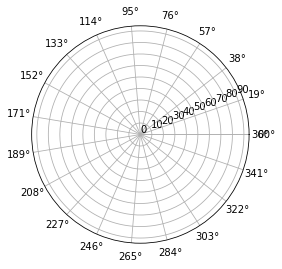

In [23]:
deg = np.pi/180
angleTheta = np.linspace(0, 90, 10)
anglePhi = np.linspace(0*deg, 360*deg, 20)
thetam, phim = np.meshgrid(angleTheta, anglePhi)
ax = plt.subplot(111, polar=True)
ax.plot(phim, thetam, ls='none')
ax.set_rticks(angleTheta)
ax.set_xticks(anglePhi)
plt.show()

Note that each sub-element has dimensions $d\phi d\theta$, which is not the exact projection of the hemisphere onto the plane. This mismatch can be fixed by multiplying by $\sin{\theta}$, though the simple angular depiction is likely good enough for visualizing beam properties. For integrating the radiation patterns, the $\sin{\theta}$ must be included, of course.

In [25]:
modPatt.directed_beam_2D(sa,0,0)

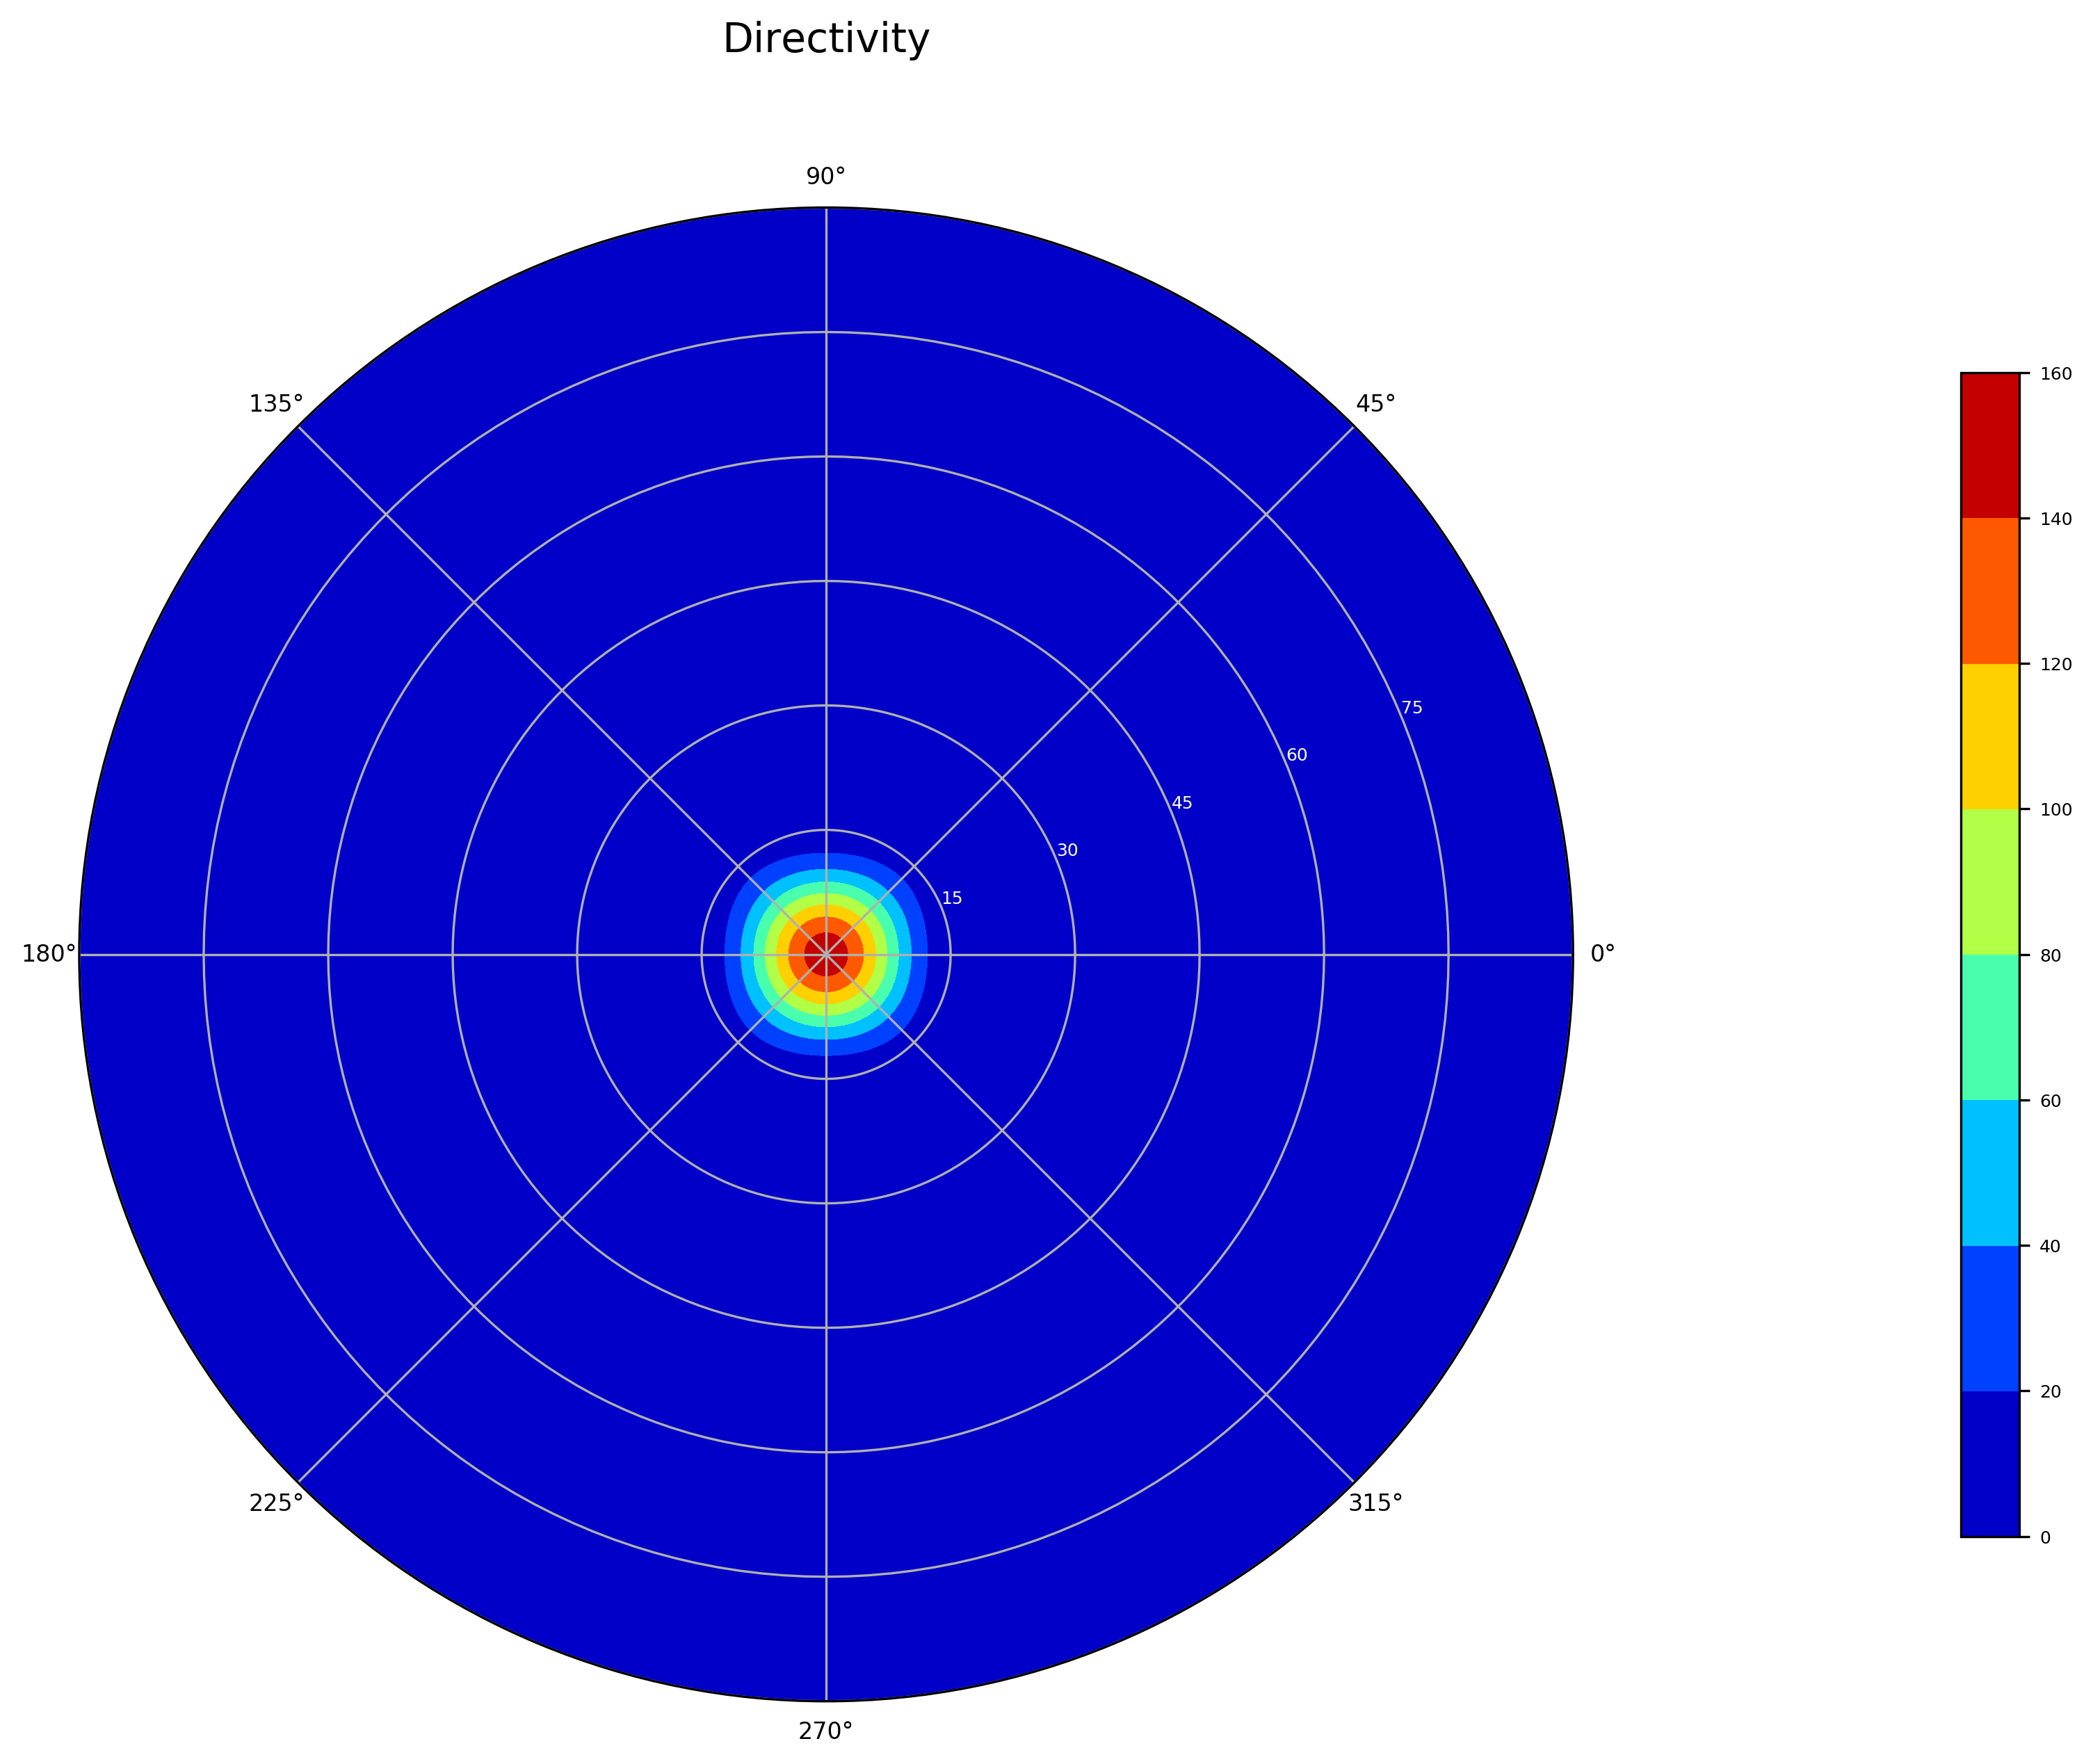

<Figure size 216x216 with 0 Axes>

In [27]:
theta, phi, rp_vs_angle = SysOut.radiation_pattern_2D(sa, theta_start = 0, theta_stop = 90, theta_num = 100, phi_start=-0, phi_stop=360, phi_num=100, scan_type='angle')
dt.plot_polar_2D_angle(phi, theta, rp_vs_angle, title='Directivity', plot_size=12, dpi=300)
u=plt.gcf()
u.set_size_inches(3,3)

We can study the 2D beam pattern as a function of steering angle, as in the following:

In [28]:
fig = plt.figure(figsize=(12,12),dpi=300)
scanPhiAngles = [0, 45, 90, 135, 180, 225, 270, 315]
numAngles = len(scanPhiAngles)
nrows = np.rint(numAngles/3)
ncols = 3

<Figure size 3600x3600 with 0 Axes>

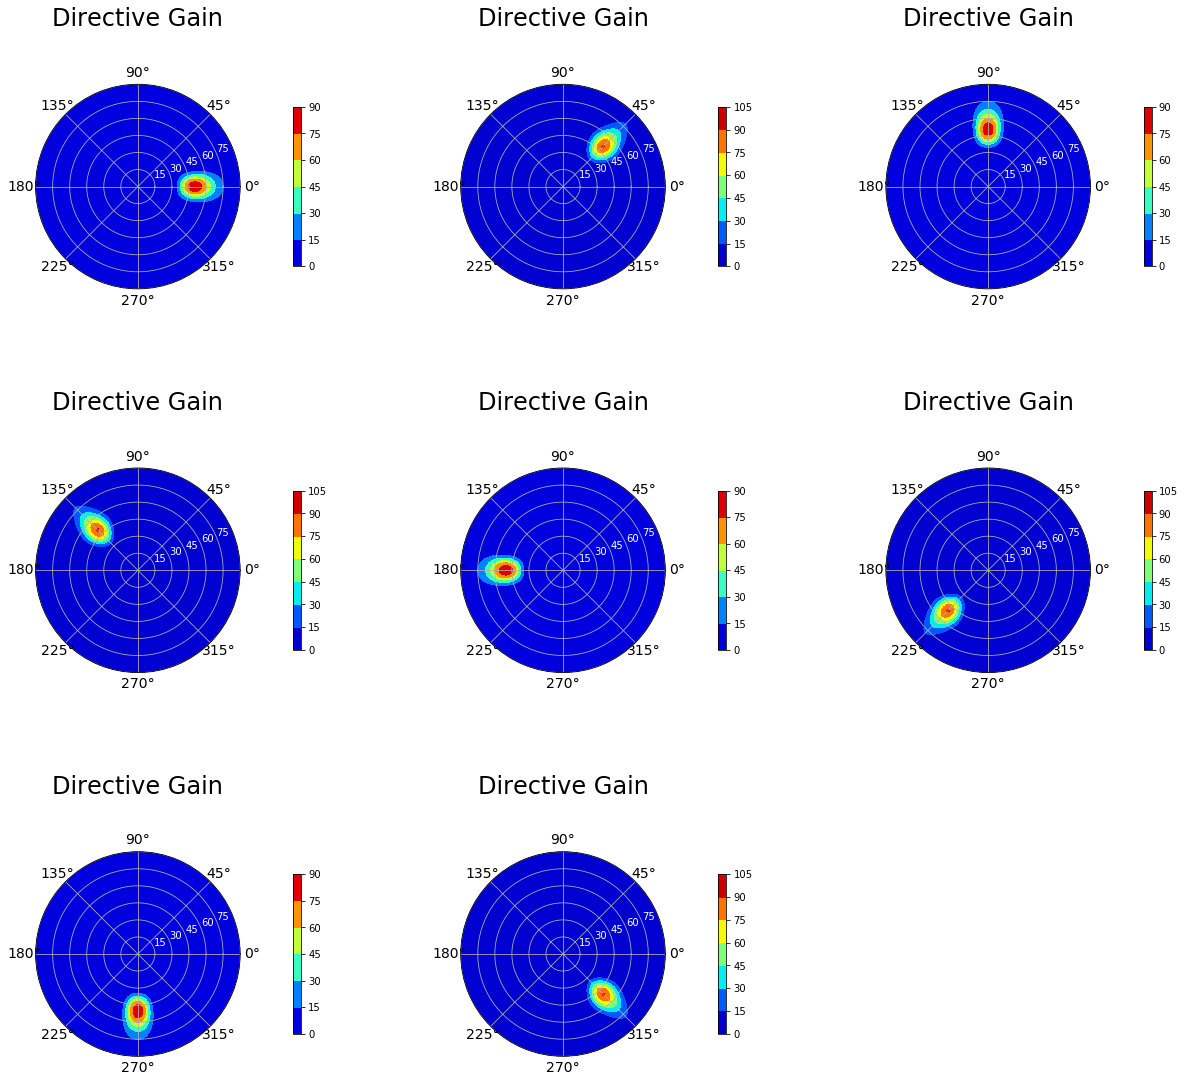

In [32]:
iPlotIndex = 1
for scanPhi in scanPhiAngles:
    modPatt.directed_beam_2D(sa,scanPhi,50)
    theta, phi, rp_vs_angle = SysOut.radiation_pattern_2D(sa, theta_start = 0, theta_stop = 90, theta_num = 200, phi_start=-0, phi_stop=360, phi_num=200, scan_type='angle')    
    ax = plt.subplot(nrows, ncols, iPlotIndex, polar=True)
    dt.plot_polar_2D_angle(phi, theta, rp_vs_angle, 
                        title='Directive Gain', suppress_plot=True, plot_reference =ax, dpi=300, plot_size=20)
    u=plt.gcf()
    u.set_size_inches(20,20)
    iPlotIndex = iPlotIndex + 1
plt.subplots_adjust(wspace = .6)
plt.show()

## Directive gain and directivity

The directivity is an important parameter for antennas. The radiation pattern plots above are plots of directive gain, which has the form

$D(\theta,\phi)=4 \pi \frac{U(\theta,\phi)}{P_{tot}}$

where

$P_{tot}=\int_0^{2\pi} \int_0^{\pi/2} U(\theta,\phi) \sin{\theta} d\theta d\phi$

The integral over $\theta$ is taken over the hemisphere, which is why the integral extends only to $\pi/2$ rather than $\pi$. The *directivity* is taken as the peak directive gain, or

$D=\textrm{max}(D(\theta,\phi))$

The function DataAnalysis.CalculateDirectivity(theta, phi, U) provides the means of computing the directivity, or peak directive gain, once the radiation pattern has been computed.

Consider an example for a beam pointed in the broadside direction.

In [33]:
sa.make_linear_2D_array(spcx, spcy, number_elements_x=40, number_elements_y=40)
sa.dipole_type = 'ideal-unconstrained'
sa.summarize_parameters()

Operating Frequency: 10.0 GHz
Operating Wavelength: 2.99792458 cm
Dipole Type: ideal-unconstrained
Layout Type: linear 2D
Dipole Spacing along x: 0.5cm
Dipole Spacing along y: 0.5cm
Aperture Size along x: 19.5cm
Aperture Size along y: 19.5cm
Number of Dipoles along x: 40
Number of Dipoles along y: 40
Feed Type: plane wave
Waveguide Index: 2.5
Modulation Type: ideal


In [37]:
modPatt.directed_beam_2D(sa,0,0)
theta, phi, rp_vs_angle = SysOut.radiation_pattern_2D(sa, theta_start = 0, theta_stop = 90, theta_num = 400, phi_start=-0, phi_stop=360, phi_num=400, scan_type='angle')
dt.calculate_directivity(theta, phi, rp_vs_angle, calculation_type='directivitydb')

27.600970741346856

The computed directivity is thus 27.6 dB. We can check the consistency of this result by checking the half-power angles:

In [40]:
rp = SysOut.radiation_pattern_2D(sa, theta_start=-85, theta_stop=85, theta_num=400, 
                                   phi_0=0, scan_type='theta_slice')
beamwidth1, beamdirection1, f1, f2 = dt.calculate_beamwidth(rp)
rp = SysOut.radiation_pattern_2D(sa, theta_start=-85, theta_stop=85, theta_num=400, 
                                   phi_0=90, scan_type='theta_slice')
beamwidth2, beamdirection2, f1, f2 = dt.calculate_beamwidth(rp)

In [41]:
print(beamwidth1 * 180/np.pi)

7.632603724355219


In [42]:
print(beamwidth2 * 180/np.pi)

7.632603724355219


Using these half-power beamwidths, the approximate directivity can be found as

$D=\frac{4 \pi}{\Omega_A}=4\pi \frac{(\frac{180}{\pi})^2}{\Theta_{1d}\Theta_{2d}}$

This calculation gives 27.45 dB, in close agreement with that computed above.

## Alternative plotting coordinates for the radiation pattern

An alternative to the polar angle plots shown above is to use $k_x$ and $k_y$, or $k_0 \cos{\theta_x}$ and $k_0 \cos{\theta_y}$. These angles are identical with the angular system shown in the second figure of the introduction.

To illustrate the alternative visualization, we provide an example aperture with the following parameters.

In [43]:
sa.make_linear_2D_array(0.4*cm, 0.4*cm, number_elements_x=15, number_elements_y=15)
modPatt = ModulationPattern(sa, modulation_type='ideal')
modPatt.directed_beam_2D(sa,30,45)
sa.summarize_parameters()

Operating Frequency: 10.0 GHz
Operating Wavelength: 2.99792458 cm
Dipole Type: ideal-unconstrained
Layout Type: linear 2D
Dipole Spacing along x: 0.4cm
Dipole Spacing along y: 0.4cm
Aperture Size along x: 5.6cm
Aperture Size along y: 5.6cm
Number of Dipoles along x: 15
Number of Dipoles along y: 15
Feed Type: plane wave
Waveguide Index: 2.5
Modulation Type: ideal


In [44]:
angleX, angleY, radPatt = SysOut.radiation_pattern_2D(sa, theta_start=5, theta_stop =175,
                                                   theta_num=50, phi_start=5, phi_stop=175,
                                                   phi_num=50, scan_type='xy')

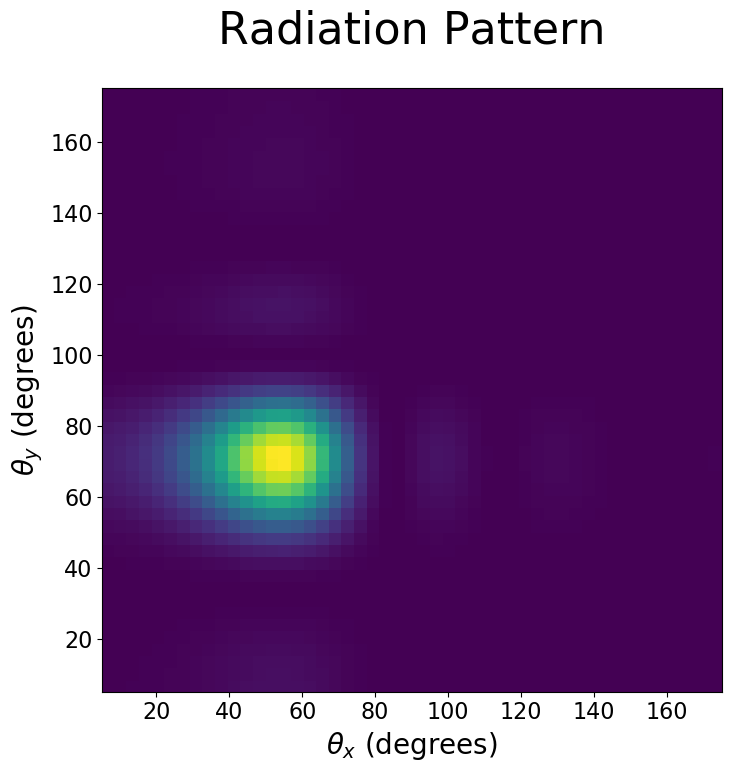

In [45]:
dt.plot_density_2D(angleX, angleY, radPatt, normalize=True, title='Radiation Pattern')